In [151]:
import pandas as pd
from glob import glob
from PIL import Image
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
OUTPUT_FOLDER = "../data/flickr/maps_raw"
images = glob("../data/flickr/archive/*jpg")
already_done = glob("../data/flickr/maps_raw/*png")
final_image_list = []
for file in images:
    output_file = os.path.join(OUTPUT_FOLDER,os.path.basename(file.replace(".jpg",".png")))
    if output_file in already_done:
        final_image_list.append(file)
    else:
        continue
print("all files : {}\nfinal image lists : {}".format(len(images),len(final_image_list)))

all files : 4319
final image lists : 3227


In [153]:
seg_maps = [os.path.join(OUTPUT_FOLDER,os.path.basename(f.replace(".jpg",".png")))\
    for f in final_image_list ]
seg_maps[:2]    

['../data/flickr/maps_raw/00000000.png',
 '../data/flickr/maps_raw/00000000_(2).png']

In [154]:
# np.array(Image.open(seg_maps[0]))
# for seg_map in seg_maps:
# list(np.unique(np.array(Image.open(seg_maps[0]))))
np.array(Image.open(seg_maps[0])).shape

(513, 513)

In [155]:
# pd.Series([1,2,2,3]).value_counts().reset_index().rename(columns={"index":"class",\
#     0:"count"})

class  count
0      2      2
1      1      1
2      3      1

In [156]:

from tqdm import tqdm
df_profile = pd.DataFrame()
for i,seg_map in tqdm(enumerate(seg_maps),total=len(seg_maps)):
    img_classes = list(np.array(Image.open(seg_map)).flatten())
    
    # df = pd.Series(img_classes).value_counts().reset_index().rename(columns={"index":"class",\
    #                                                                         0:"count"})
    df = pd.DataFrame([[int(t),len([img_ for img_ in img_classes if img_==t])] for t in np.unique(img_classes)],columns=["class","count"])                                                                       
    df["seg_path"] = seg_map
    df["img_path"] = df["seg_path"].apply(lambda x: x.replace(".png",".jpg")).\
        apply(lambda x: x.replace("maps_raw","archive"))
    if df_profile.empty:
        df_profile = df.copy()
    else:
        df_profile = df_profile.append(df.copy())
    # break
df_profile.head()

100%|██████████| 3227/3227 [03:56<00:00, 13.62it/s]


class   count                                  seg_path  \
0    105   87318      ../data/flickr/maps_raw/00000000.png   
1    123   26123      ../data/flickr/maps_raw/00000000.png   
2    126  149728      ../data/flickr/maps_raw/00000000.png   
0    105  112837  ../data/flickr/maps_raw/00000000_(2).png   
1    134   10558  ../data/flickr/maps_raw/00000000_(2).png   

                                  img_path  
0      ../data/flickr/archive/00000000.jpg  
1      ../data/flickr/archive/00000000.jpg  
2      ../data/flickr/archive/00000000.jpg  
0  ../data/flickr/archive/00000000_(2).jpg  
1  ../data/flickr/archive/00000000_(2).jpg

In [157]:
def get_classtable():
    with open("../dev_flickr/deeplab-pytorch/data/datasets/cocostuff/labels.txt") as f:
        classes = {}
        for label in f:
            label = label.rstrip().split("\t")
            classes[int(label[0])] = label[1].split(",")[0]
    return classes
class_table = get_classtable()
class_table[0]    

'person'

In [163]:
df_profile["class_name"] = df_profile["class"].map(class_table)
# df_profile["class_name"].value_counts(dropna=False).index
df_profile["class_name"].value_counts(dropna=False).to_frame().to_csv("class_count.csv")

In [160]:
df_profile["fname"] = df_profile["img_path"].apply(lambda x: str(os.path.basename(x)[:-4]))
df_profile.sample(2)

class  count                                  seg_path  \
1    105  19675  ../data/flickr/maps_raw/00000439_(3).png   
4    134  24063  ../data/flickr/maps_raw/00000339_(5).png   

                                  img_path class_name         fname  
1  ../data/flickr/archive/00000439_(3).jpg     clouds  00000439_(3)  
4  ../data/flickr/archive/00000339_(5).jpg   mountain  00000339_(5)

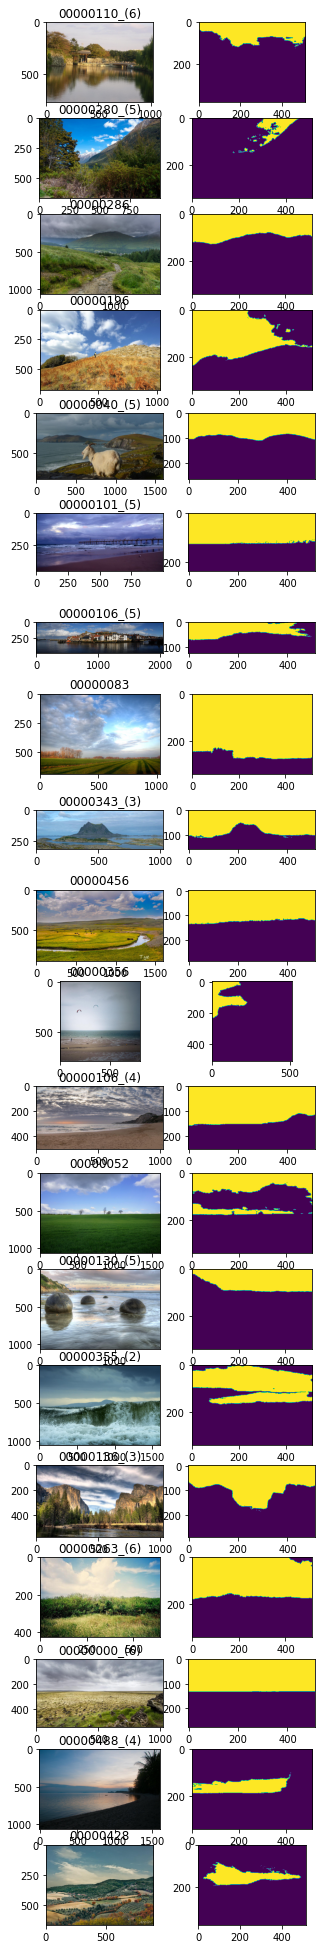

In [164]:
# inspect 20
class_name = "clouds"
samples = df_profile[df_profile["class_name"]==class_name][["class","img_path","seg_path","fname"]].drop_duplicates().sample(20)
samples = samples.reset_index(drop=True)
fix,axs = plt.subplots(20,2,figsize=(5,35))
for i,row in samples.iterrows():
    img_read = np.array(Image.open(row["img_path"]))
    map_read = np.array(Image.open(row["seg_path"]))
    axs[i,0].imshow(img_read)
    blank_image = np.zeros_like(map_read)
    blank_image[np.where(map_read==row["class"])]=255
    axs[i,1].imshow(blank_image)
    axs[i,0].set_title(str(row["fname"]))

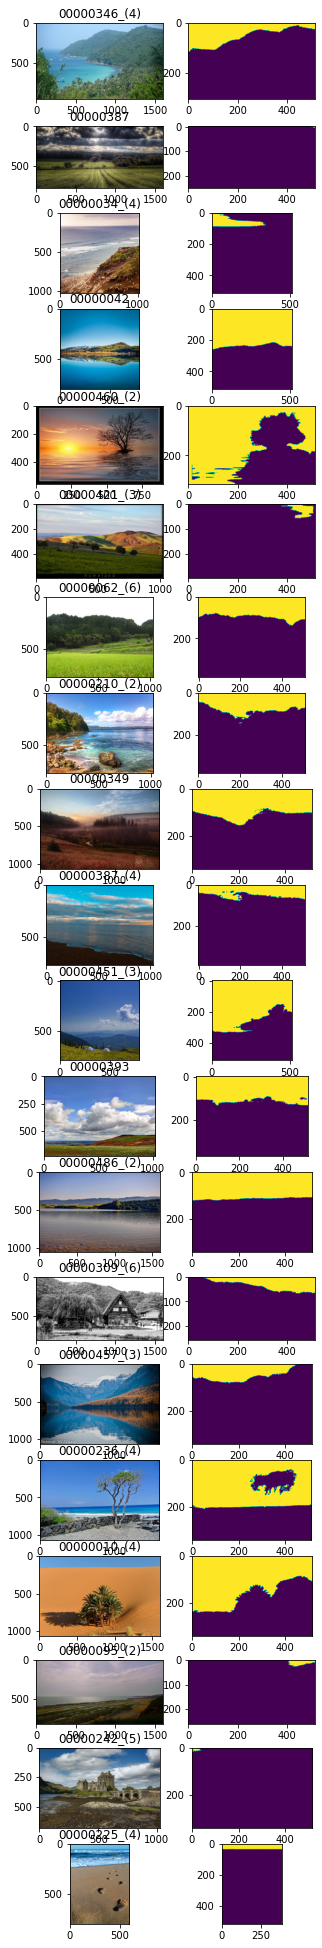

In [165]:
# inspect 20
class_name = "sky-other"
samples = df_profile[df_profile["class_name"]==class_name][["class","img_path","seg_path","fname"]].drop_duplicates().sample(20)
samples = samples.reset_index(drop=True)
fix,axs = plt.subplots(20,2,figsize=(5,35))
for i,row in samples.iterrows():
    img_read = np.array(Image.open(row["img_path"]))
    map_read = np.array(Image.open(row["seg_path"]))
    axs[i,0].imshow(img_read)
    blank_image = np.zeros_like(map_read)
    blank_image[np.where(map_read==row["class"])]=255
    axs[i,1].imshow(blank_image)
    axs[i,0].set_title(str(row["fname"]))

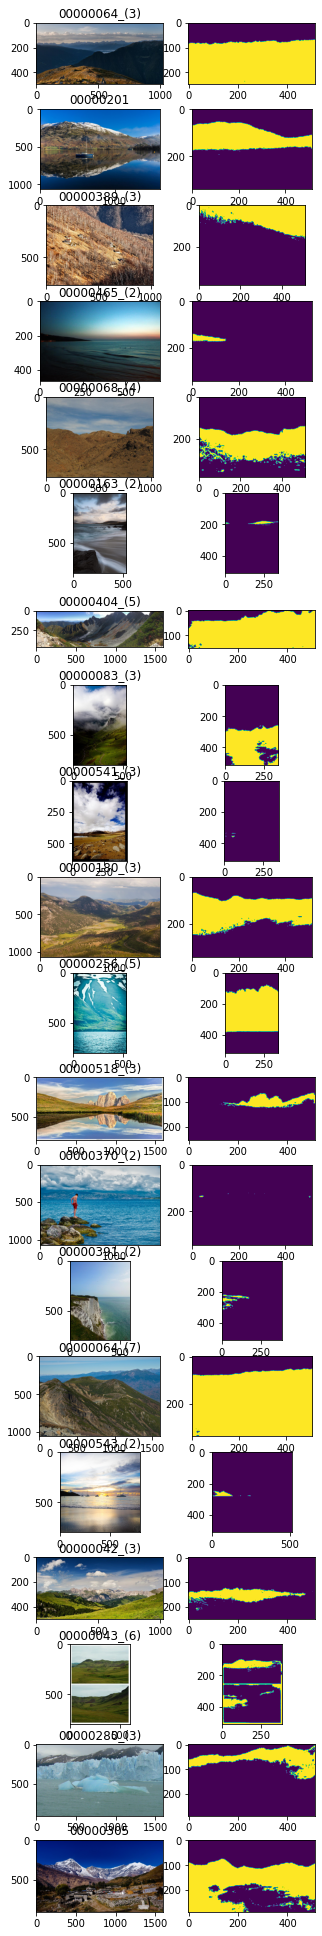

In [166]:
# inspect 20
class_name = "mountain"
samples = df_profile[df_profile["class_name"]==class_name][["class","img_path","seg_path","fname"]].drop_duplicates().sample(20)
samples = samples.reset_index(drop=True)
fix,axs = plt.subplots(20,2,figsize=(5,35))
for i,row in samples.iterrows():
    img_read = np.array(Image.open(row["img_path"]))
    map_read = np.array(Image.open(row["seg_path"]))
    axs[i,0].imshow(img_read)
    blank_image = np.zeros_like(map_read)
    blank_image[np.where(map_read==row["class"])]=255
    axs[i,1].imshow(blank_image)
    axs[i,0].set_title(str(row["fname"]))

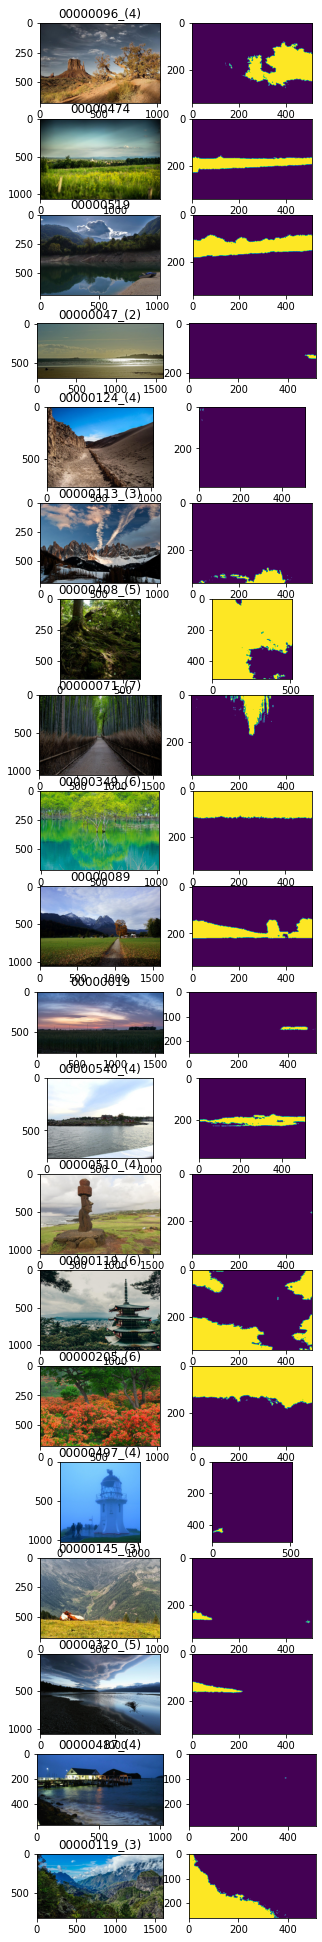

In [167]:
# inspect 20
class_name = "tree"
samples = df_profile[df_profile["class_name"]==class_name][["class","img_path","seg_path","fname"]].drop_duplicates().sample(20)
samples = samples.reset_index(drop=True)
fix,axs = plt.subplots(20,2,figsize=(5,35))
for i,row in samples.iterrows():
    img_read = np.array(Image.open(row["img_path"]))
    map_read = np.array(Image.open(row["seg_path"]))
    axs[i,0].imshow(img_read)
    blank_image = np.zeros_like(map_read)
    blank_image[np.where(map_read==row["class"])]=255
    axs[i,1].imshow(blank_image)
    axs[i,0].set_title(str(row["fname"]))

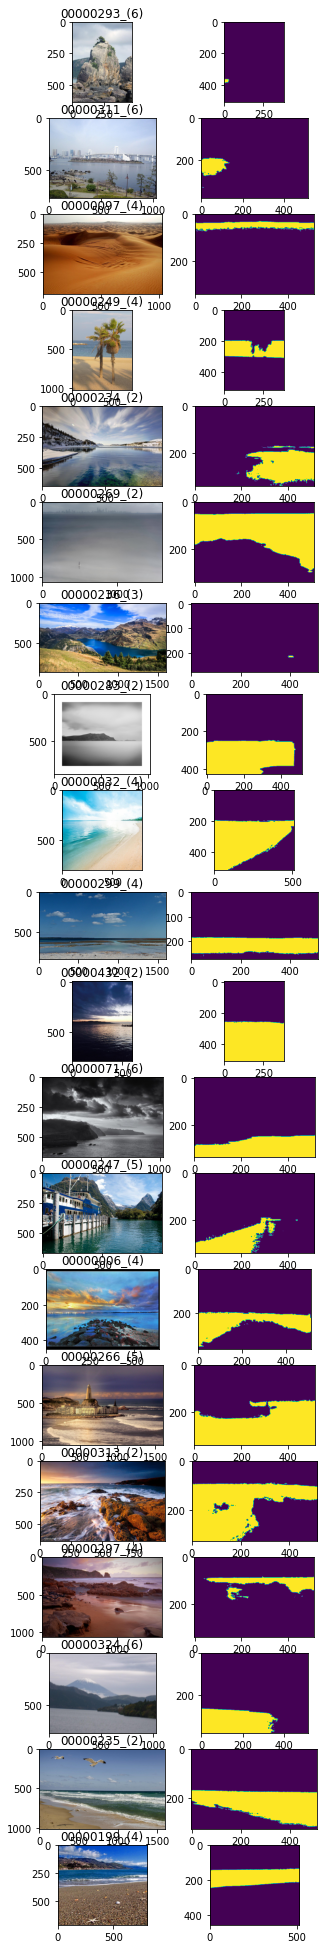

In [168]:
# inspect 20
class_name = "sea"
samples = df_profile[df_profile["class_name"]==class_name][["class","img_path","seg_path","fname"]].drop_duplicates().sample(20)
samples = samples.reset_index(drop=True)
fix,axs = plt.subplots(20,2,figsize=(5,35))
for i,row in samples.iterrows():
    img_read = np.array(Image.open(row["img_path"]))
    map_read = np.array(Image.open(row["seg_path"]))
    axs[i,0].imshow(img_read)
    blank_image = np.zeros_like(map_read)
    blank_image[np.where(map_read==row["class"])]=255
    axs[i,1].imshow(blank_image)
    axs[i,0].set_title(str(row["fname"]))

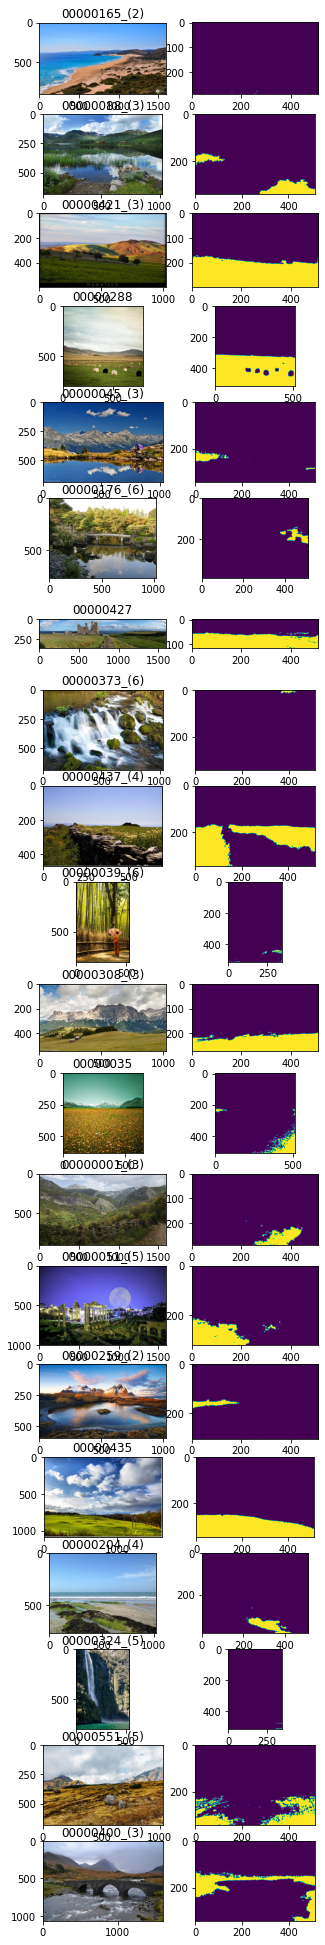

In [169]:
# inspect 20
class_name = "grass"
samples = df_profile[df_profile["class_name"]==class_name][["class","img_path","seg_path","fname"]].drop_duplicates().sample(20)
samples = samples.reset_index(drop=True)
fix,axs = plt.subplots(20,2,figsize=(5,35))
for i,row in samples.iterrows():
    img_read = np.array(Image.open(row["img_path"]))
    map_read = np.array(Image.open(row["seg_path"]))
    axs[i,0].imshow(img_read)
    blank_image = np.zeros_like(map_read)
    blank_image[np.where(map_read==row["class"])]=255
    axs[i,1].imshow(blank_image)
    axs[i,0].set_title(str(row["fname"]))

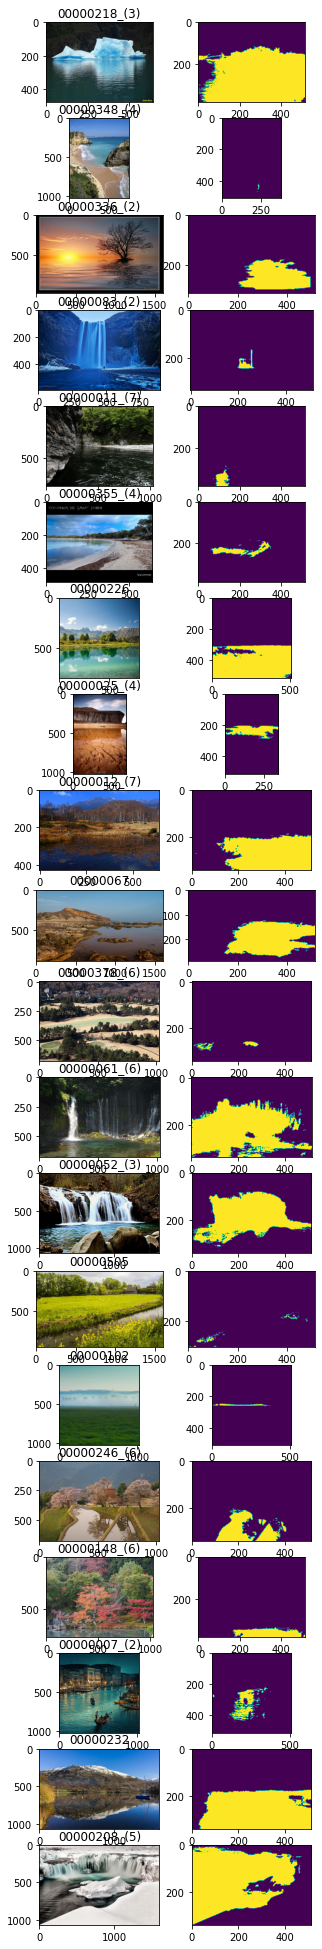

In [170]:
# inspect 20
class_name = "water-other"
samples = df_profile[df_profile["class_name"]==class_name][["class","img_path","seg_path","fname"]].drop_duplicates().sample(20)
samples = samples.reset_index(drop=True)
fix,axs = plt.subplots(20,2,figsize=(5,35))
for i,row in samples.iterrows():
    img_read = np.array(Image.open(row["img_path"]))
    map_read = np.array(Image.open(row["seg_path"]))
    axs[i,0].imshow(img_read)
    blank_image = np.zeros_like(map_read)
    blank_image[np.where(map_read==row["class"])]=255
    axs[i,1].imshow(blank_image)
    axs[i,0].set_title(str(row["fname"]))

In [236]:
selected_classes = ["clouds" ,
"sky-other" ,
"mountain" ,
"tree" ,
"sea" ,
"grass" ,
"rock" ,
"hill" ,
"sand" ,
"river" ,
"water-other" ,
"bush" ,]
files_with_other_classes = df_profile[df_profile["class_name"].isin(FLICKRCLASSES)==False]["fname"].unique()

files_with_only_classes = df_profile[df_profile["fname"].isin(files_with_other_classes)==False]
files_with_only_classes = files_with_only_classes.reset_index(drop=True)
final_file_list = list(files_with_only_classes["img_path"].unique())
files_with_only_classes["fname"].nunique()

1338

In [237]:
files_with_only_classes["class"].value_counts()

105    986
134    895
156    864
154    655
168    563
123    390
126    379
149    360
153    292
147    182
177    143
96      95
Name: class, dtype: int64

In [238]:
files_with_only_classes.sample(3)

class  count                                  seg_path  \
807     168   7381      ../data/flickr/maps_raw/00000076.png   
3468    134   2466      ../data/flickr/maps_raw/00000282.png   
1989    126  16816  ../data/flickr/maps_raw/00000174_(5).png   

                                     img_path class_name         fname  
807       ../data/flickr/archive/00000076.jpg       tree      00000076  
3468      ../data/flickr/archive/00000282.jpg   mountain      00000282  
1989  ../data/flickr/archive/00000174_(5).jpg       hill  00000174_(5)

In [239]:

for i,row in tqdm(files_with_only_classes.iterrows(),total=len(files_with_only_classes)):
    shape_x,shape_y = Image.open(row["img_path"]).size
    files_with_only_classes.loc[i,"shape_x"] = shape_x
    files_with_only_classes.loc[i,"shape_y"] = shape_y

100%|██████████| 5804/5804 [00:04<00:00, 1162.87it/s]


In [240]:
files_with_only_classes[["shape_x","shape_y"]].describe()

shape_x      shape_y
count  5804.000000  5804.000000
mean   1169.347347   806.296347
std     365.550269   198.997812
min     333.000000    88.000000
25%    1023.000000   683.000000
50%    1024.000000   777.000000
75%    1600.000000  1024.000000
max    2048.000000  1090.000000

In [241]:
files_with_only_classes[(files_with_only_classes["shape_y"]>256)&(files_with_only_classes["shape_x"]>256)].fname.nunique()

1334

In [242]:
files_with_only_classes[(files_with_only_classes["shape_y"]>256)&(files_with_only_classes["shape_x"]>256)][["shape_x","shape_y"]].describe()

shape_x      shape_y
count  5783.000000  5783.000000
mean   1169.578420   808.549369
std     365.994616   195.779222
min     333.000000   284.000000
25%    1023.000000   683.000000
50%    1024.000000   782.000000
75%    1600.000000  1024.000000
max    2048.000000  1090.000000

In [205]:
files_with_only_classes.head(1)

class  count                              seg_path  \
0    105  87318  ../data/flickr/maps_raw/00000000.png   

                              img_path class_name     fname         shape  \
0  ../data/flickr/archive/00000000.jpg     clouds  00000000  (1024, 1024)   

   shape_x  shape_y  
0   1024.0   1024.0

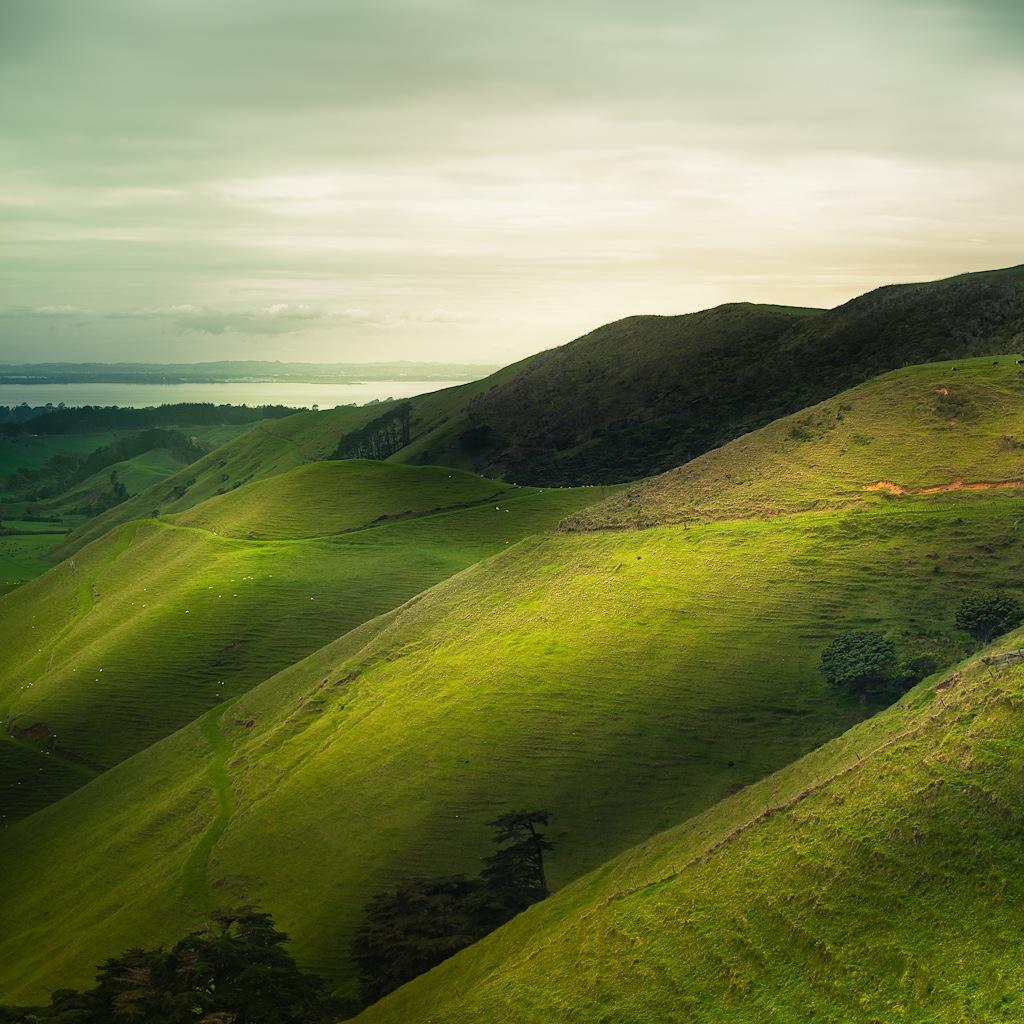

In [207]:
Image.open("../data/flickr/archive/00000000.jpg")

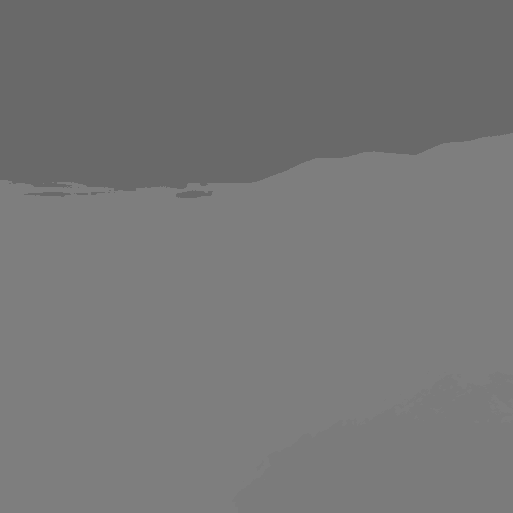

In [212]:
Image.open("../data/flickr/archive/00000000.jpg".replace(".jpg",".png").replace("archive","maps_raw"))

In [216]:
# Image.open("../data/flickr/archive/00000000.jpg".replace(".jpg",".png").replace("archive","maps_raw")).convert("RGB")

In [221]:
label = np.array(Image.open("../data/flickr/archive/00000000.jpg".replace(".jpg",".png").replace("archive","maps_raw")))
classTable = get_classtable()
FLICKRCLASSES = ["clouds" ,
                "sky-other" ,
                "mountain" ,
                "tree" ,
                "sea" ,
                "grass" ,
                "rock" ,
                "hill" ,
                "sand" ,
                "river" ,
                "water-other" ,
                "bush" ,]

In [227]:
classTable = {int(k):FLICKRCLASSES.index(v) for k,v in classTable.items() if v in FLICKRCLASSES}
classTable

{96: 11,
 105: 0,
 123: 5,
 126: 7,
 134: 2,
 147: 9,
 149: 6,
 153: 8,
 154: 4,
 156: 1,
 168: 3,
 177: 10}

In [228]:
for k,v in classTable.items():
    label[label==k] = v
np.unique(label)    

array([0, 5, 7], dtype=uint8)

In [231]:
label = Image.open("../data/flickr/maps_raw/00000000_(7).png".replace(".jpg",".png").replace("archive","maps_raw"))
label = np.array(label)
np.unique(label)

array([ 95, 134, 154, 156, 168], dtype=uint8)

In [233]:
df_profile[df_profile["fname"]=="00000000_(7)"]

class  count                                  seg_path  \
0     95   2844  ../data/flickr/maps_raw/00000000_(7).png   
1    134  23382  ../data/flickr/maps_raw/00000000_(7).png   
2    154  61877  ../data/flickr/maps_raw/00000000_(7).png   
3    156  86051  ../data/flickr/maps_raw/00000000_(7).png   
4    168   1292  ../data/flickr/maps_raw/00000000_(7).png   

                                  img_path      class_name         fname  
0  ../data/flickr/archive/00000000_(7).jpg  building-other  00000000_(7)  
1  ../data/flickr/archive/00000000_(7).jpg        mountain  00000000_(7)  
2  ../data/flickr/archive/00000000_(7).jpg             sea  00000000_(7)  
3  ../data/flickr/archive/00000000_(7).jpg       sky-other  00000000_(7)  
4  ../data/flickr/archive/00000000_(7).jpg            tree  00000000_(7)

In [235]:
files_with_only_classes[files_with_only_classes["fname"]=="00000000_(7)"]

class  count                                  seg_path  \
27    134  23382  ../data/flickr/maps_raw/00000000_(7).png   
28    154  61877  ../data/flickr/maps_raw/00000000_(7).png   
29    156  86051  ../data/flickr/maps_raw/00000000_(7).png   
30    168   1292  ../data/flickr/maps_raw/00000000_(7).png   

                                   img_path class_name         fname  \
27  ../data/flickr/archive/00000000_(7).jpg   mountain  00000000_(7)   
28  ../data/flickr/archive/00000000_(7).jpg        sea  00000000_(7)   
29  ../data/flickr/archive/00000000_(7).jpg  sky-other  00000000_(7)   
30  ../data/flickr/archive/00000000_(7).jpg       tree  00000000_(7)   

          shape  shape_x  shape_y  
27  (1024, 683)   1024.0    683.0  
28  (1024, 683)   1024.0    683.0  
29  (1024, 683)   1024.0    683.0  
30  (1024, 683)   1024.0    683.0